In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

C:\Users\archishman vb\AppData\Roaming\Python\Python310\site-packages\yfinance\base.py:48: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  _empty_series = pd.Series()


In [2]:
start = '2012-01-01'
end = '2024-01-01'

stock = 'NVDA'

data = yf.download(stock, start, end)

[*********************100%%**********************]  1 of 1 completed


In [3]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,3.575000,3.600000,3.502500,3.510000,3.219882,46804400
2012-01-04,3.512500,3.565000,3.480000,3.550000,3.256576,34737200
2012-01-05,3.532500,3.695000,3.517500,3.677500,3.373537,56354800
2012-01-06,3.675000,3.677500,3.592500,3.635000,3.334551,53325200
2012-01-09,3.637500,3.705000,3.610000,3.635000,3.334551,50824400
...,...,...,...,...,...,...
2023-12-22,491.950012,493.829987,484.670013,488.299988,488.299988,25213900
2023-12-26,489.679993,496.000000,489.600006,492.790009,492.790009,24420000
2023-12-27,495.109985,496.799988,490.850006,494.170013,494.170013,23364800


In [4]:
data.reset_index(inplace=True)
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2012-01-03,3.575000,3.600000,3.502500,3.510000,3.219882,46804400
1,2012-01-04,3.512500,3.565000,3.480000,3.550000,3.256576,34737200
2,2012-01-05,3.532500,3.695000,3.517500,3.677500,3.373537,56354800
3,2012-01-06,3.675000,3.677500,3.592500,3.635000,3.334551,53325200
4,2012-01-09,3.637500,3.705000,3.610000,3.635000,3.334551,50824400
...,...,...,...,...,...,...,...
3013,2023-12-22,491.950012,493.829987,484.670013,488.299988,488.299988,25213900
3014,2023-12-26,489.679993,496.000000,489.600006,492.790009,492.790009,24420000
3015,2023-12-27,495.109985,496.799988,490.850006,494.170013,494.170013,23364800
3016,2023-12-28,496.429993,498.839996,494.119995,495.220001,495.220001,24658700


In [5]:
ma_100=data.Close.rolling(100).mean()

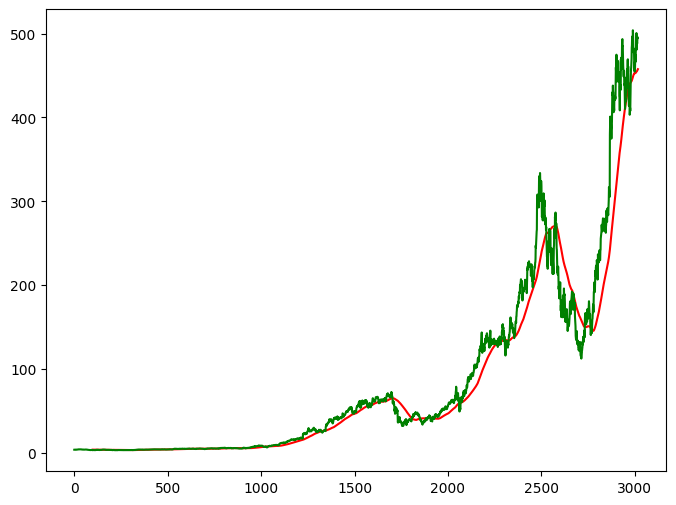

In [6]:
plt.figure(figsize=(8,6))
plt.plot(ma_100,'r')
plt.plot(data.Close, 'g')
plt.show()

In [7]:
ma_200=data.Close.rolling(200).mean()

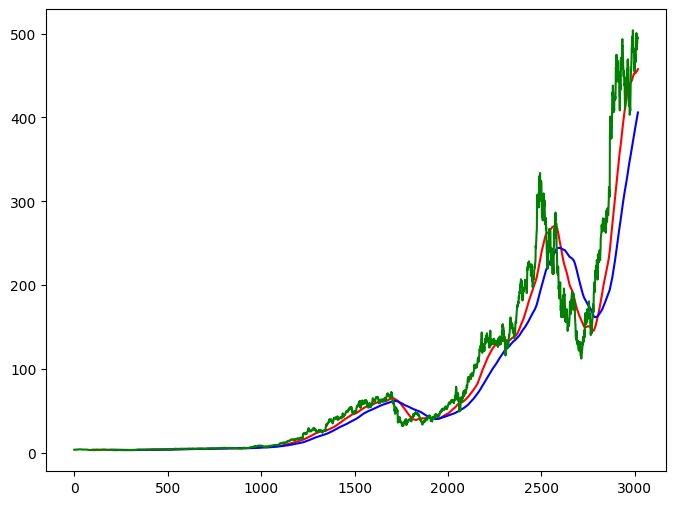

In [8]:
plt.figure(figsize=(8,6))
plt.plot(ma_100,'r')
plt.plot(ma_200,'b')
plt.plot(data.Close, 'g')
plt.show()

In [9]:
data.dropna(inplace=True)

In [10]:
data_train=pd.DataFrame(data.Close[0:int(len(data)*0.80)])
data_test=pd.DataFrame(data.Close[int(len(data)*0.80):])

In [11]:
data_train.shape

(2414, 1)

In [12]:
data_test.shape

(604, 1)

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [14]:
data_train_scaled=scaler.fit_transform(data_train)

In [15]:
x=[]
y=[]

for i in range(100,data_train_scaled.shape[0]):
  x.append(data_train_scaled[i-100:i])
  y.append(data_train_scaled[i,0])

In [16]:
x,y = np.array(x), np.array(y)

In [17]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [18]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True,
               input_shape=((x.shape[1],1))))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [19]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [20]:
model.fit(x,y, epochs=50, batch_size=32, verbose=1)

Epoch 1/50
73/73 [==============================] - 17s 169ms/step - loss: 0.0143
Epoch 2/50
73/73 [==============================] - 12s 162ms/step - loss: 0.0041
Epoch 3/50
73/73 [==============================] - 12s 158ms/step - loss: 0.0037
Epoch 4/50
73/73 [==============================] - 12s 158ms/step - loss: 0.0036
Epoch 5/50
73/73 [==============================] - 11s 157ms/step - loss: 0.0038
Epoch 6/50
73/73 [==============================] - 12s 158ms/step - loss: 0.0029
Epoch 7/50
73/73 [==============================] - 12s 159ms/step - loss: 0.0030
Epoch 8/50
73/73 [==============================] - 12s 160ms/step - loss: 0.0026
Epoch 9/50
73/73 [==============================] - 12s 159ms/step - loss: 0.0032
Epoch 10/50
73/73 [==============================] - 12s 158ms/step - loss: 0.0026
Epoch 11/50
73/73 [==============================] - 12s 160ms/step - loss: 0.0019
Epoch 12/50
73/73 [==============================] - 14s 197ms/step - loss: 0.0025
Epoch 13/50
7

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100, 50)           10400     
                                                                 
 dropout (Dropout)           (None, 100, 50)           0         
                                                                 
 lstm_1 (LSTM)               (None, 100, 60)           26640     
                                                                 
 dropout_1 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_2 (LSTM)               (None, 100, 80)           45120     
                                                                 
 dropout_2 (Dropout)         (None, 100, 80)           0         
                                                                 
 lstm_3 (LSTM)               (None, 120)               9

In [22]:
past_100_days=data_train.tail(100)

data_test=pd.concat([past_100_days, data_test], ignore_index=True)

In [23]:
data_test

,Close
0,132.912506
1,133.412506
2,127.224998
3,128.457504
4,131.862503
...,...
699,488.299988
700,492.790009
701,494.170013
702,495.220001


In [24]:
data_test_scaled=scaler.fit_transform(data_test)

In [25]:
x=[]
y=[]

for i in range(100,data_test_scaled.shape[0]):
  x.append(data_test_scaled[i-100:i])
  y.append(data_test_scaled[i,0])

x,y=np.array(x), np.array(y)

In [26]:
y_predict=model.predict(x)

19/19 [==============================] - 2s 49ms/step


In [27]:
y_predict

array([[0.20108706],
       [0.2041953 ],
       [0.20772554],
       [0.21128292],
       [0.21441184],
       [0.21687491],
       [0.21869648],
       [0.21991706],
       [0.2204454 ],
       [0.22011298],
       [0.21910384],
       [0.21801758],
       [0.21775462],
       [0.21891326],
       [0.22177382],
       [0.22622967],
       [0.23209506],
       [0.23899068],
       [0.2463672 ],
       [0.2537011 ],
       [0.26055557],
       [0.26676932],
       [0.27223384],
       [0.27679318],
       [0.28031242],
       [0.28285593],
       [0.28447568],
       [0.28529665],
       [0.28551227],
       [0.28528914],
       [0.28466856],
       [0.28345078],
       [0.28156307],
       [0.27926952],
       [0.27704427],
       [0.27517283],
       [0.27365452],
       [0.27211803],
       [0.27019203],
       [0.2677276 ],
       [0.26477095],
       [0.26120752],
       [0.2571901 ],
       [0.25303975],
       [0.24917863],
       [0.24588336],
       [0.24324803],
       [0.241

In [28]:
scaled=1/scaler.scale_

In [29]:
y_predict=y_predict*(scaled)

In [30]:
y=y*scaled

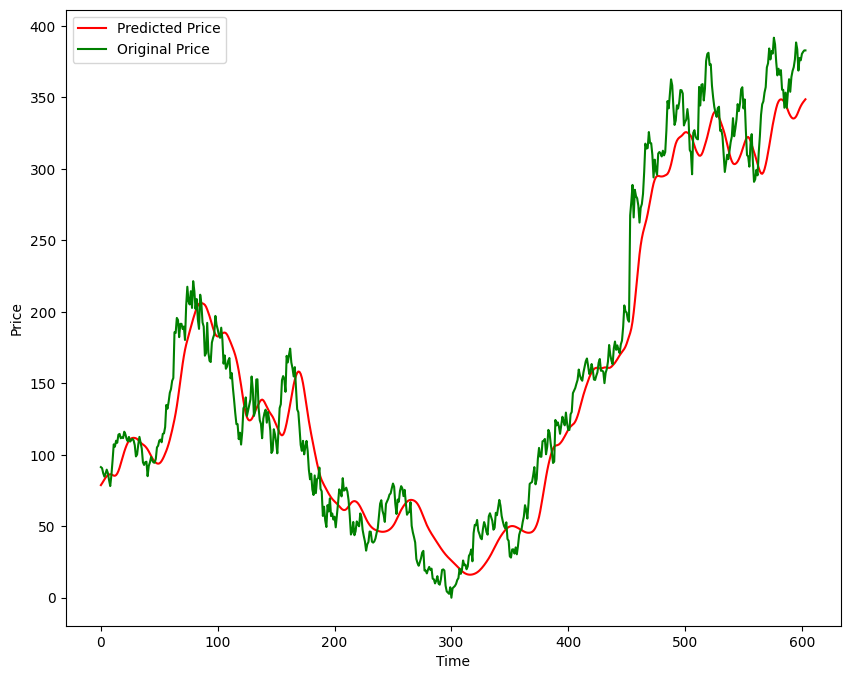

In [31]:
plt.figure(figsize=(10,8))
plt.plot(y_predict, 'r', label='Predicted Price')
plt.plot(y, 'g', label='Original Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

In [32]:
model.save('Stock Prediction model.keras')